In [7]:
import sys
import os
sys.path.append(os.path.abspath('../../Alessandro_funcs'))

import build_polynomial as bp_a
import costs as co_a
import gradient_descent as gd_a
import grid_search as gs_a
import least_squares as ls_a
import ridge_regression as rr_a
import split_data as sd_a
import stochastic_gradient_descent as sgd_a

In [8]:
import sys
import os
sys.path.append(os.path.abspath('../../Sophie_functions'))

import build_polynomial as bp_s
import costs as co_s
import gradient_descent as gd_s
import grid_search as gs_s
import least_squares as ls_s
import ridge_regression as rr_s
import split_data as sd_s
import stochastic_gradient_descent as sgd_s

In [9]:
import sys
import os
sys.path.append(os.path.abspath('../../Emanuel_functions'))

import build_polynomial as bp_e
import costs as co_e
import gradient_descent as gd_e
import grid_search as gs_e
import least_squares as ls_e
import ridge_regression as rr_e
import split_data as sd_e
import stochastic_gradient_descent as sgd_e

In [41]:
x

array([ 1.94406149,  0.62753668,  2.01244346, ..., -0.64968792,
        0.69312469, -1.14970831])

# Grid search

In [12]:
def compute_loss(y, tx, w):
    """Calculate the loss using MSE."""
    e = y - tx.dot(w)
    lv = 0.5*np.mean(np.square(e))
    return lv

def generate_w(num_intervals):
    """Generate a grid of values for w0 and w1."""
    w0 = np.linspace(-100, 200, num_intervals)
    w1 = np.linspace(-150, 150, num_intervals)
    return w0, w1


def get_best_parameters(w0, w1, losses):
    """Get the best w from the result of grid search."""
    min_row, min_col = np.unravel_index(np.argmin(losses), losses.shape)
    return losses[min_row, min_col], w0[min_row], w1[min_col]

In [24]:
#A
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))

    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i, j] = compute_loss(y, tx, np.array([w0[i], w1[j]]).transpose())
    
    return losses

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
y.shape, tx.shape

((10000,), (10000, 2))

E
Grid Search: loss*=84.84896629356496, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.007 seconds


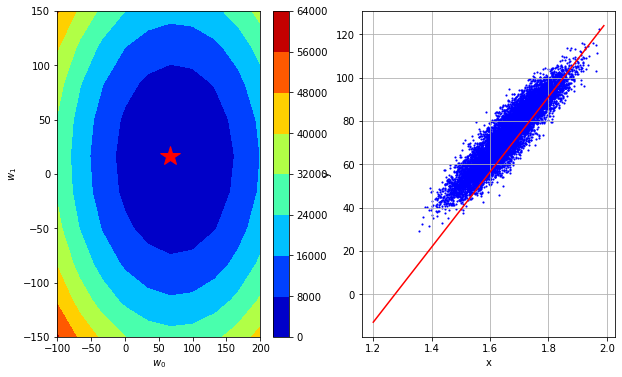

In [40]:
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))


# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

In [43]:
#A
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    
    e = (y - tx.dot(w))
    return - tx.transpose().dot(e) / y.shape[0]


def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        g = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)

        # update w by gradient
        w = w - gamma*g

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return ws, losses 

In [57]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=5584.473425518335, w0=51.3057454014736, w1=9.435798704492266
Gradient Descent(1/49): loss=530.6049242179215, w0=66.69746902191571, w1=12.266538315839991
Gradient Descent(2/49): loss=75.75675910088258, w0=71.31498610804834, w1=13.115760199244328
Gradient Descent(3/49): loss=34.82042424034894, w0=72.70024123388814, w1=13.37052676426563
Gradient Descent(4/49): loss=31.136154102900914, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=30.80456979053059, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=30.77472720241726, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=30.77204136948706, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=30.771799644523348, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=30.77177788927661, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=30.7717759313044, w0=73.29379216412119, w1=13.4796885

# SGD

In [87]:

def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    e = y - tx.dot(w)
    return - tx.transpose().dot(e) / y.shape[0]

In [88]:
#S
def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # TODO: implement stochastic gradient descent.
    ws = [initial_w]
    losses = []
    w = initial_w
    n=batch_size
    for n_iter in range(max_iters):
        indexn=np.random.choice(y.size, n)
        yn=y[indexn]
        txn=tx[indexn]
        loss=compute_loss(y, tx, w)
        grad=compute_stoch_gradient(y, tx, w)

        w=w-grad*gamma

        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))


    return ws, losses

In [89]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.7
batch_size = 2

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

[77.88910572 71.86144979]
Gradient Descent(0/99): loss=5584.473425518335, w0=51.3057454014736, w1=9.435798704492266
[59.07467645 71.15652381]
Gradient Descent(1/99): loss=530.6049242179215, w0=66.69746902191571, w1=12.266538315839991
[89.6650087  76.44182836]
Gradient Descent(2/99): loss=75.75675910088258, w0=71.31498610804834, w1=13.115760199244328
[68.65597732 57.88869374]
Gradient Descent(3/99): loss=34.82042424034894, w0=72.70024123388814, w1=13.37052676426563
[52.51776315 88.05471693]
Gradient Descent(4/99): loss=31.136154102900914, w0=73.11581777164007, w1=13.446956733772023
[55.7890806  93.49090304]
Gradient Descent(5/99): loss=30.80456979053059, w0=73.24049073296565, w1=13.469885724623941
[59.63397625 64.82022193]
Gradient Descent(6/99): loss=30.77472720241726, w0=73.27789262136334, w1=13.476764421879516
[54.80468387 55.80471836]
Gradient Descent(7/99): loss=30.77204136948706, w0=73.28911318788263, w1=13.478828031056189
[57.60140258 61.96912059]
Gradient Descent(8/99): loss=30.

# Least Squares

In [121]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    XX = np.dot(tx.transpose(),tx)
    B = np.dot(tx.transpose(),y)
    if len(XX.shape)==0:
        w_s = B/XX
    else:
        w_s = np.linalg.solve(XX,B)
    
    
    loss = compute_loss(y, tx, w_s)
    
    return w_s, loss 

In [2]:
from helpers import *
from grid_search import *

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
 
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    
    grid_w0, grid_w1 = generate_w(num_intervals=10)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    
    w_s = least_squares(y, tx)
    
    print("LS:", w_s, "\nGS:",[w0_star, w1_star])
    #raise NotImplementedError

In [3]:
test_your_least_squares()

LS: (array([73.293922  , 13.47971243]), 30.7717757376588) 
GS: [66.66666666666669, 16.666666666666686]


# Build Poly

In [255]:
#Functional????
def build_poly(x, degree):
    #Returns 3 dimensional matrix, 1:point, 2:feature, 3:coefficient
    """polynomial basis functions for input data x, for j=0 up to j=degree."""    
    xp = [x**i for i in range(degree+1)]
    xp = np.array(xp)
    xp = xp.transpose()
    if len(x.shape)>1:
        xp = xp.reshape(x.shape[0],(degree+1)*x.shape[1])
    
    return xp

In [31]:
#def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    xmat=[]
    for i in range(len(x)):
        xaug=[]
        xi=x[i]
        for j in range(degree+1):
            xaug.append(xi**j)
        xmat.append(xaug)
        
    return np.array(xmat)

In [172]:
# load dataset


shape of x (50,)
shape of y (50,)


array([0.35237491, 4.8951233 , 1.86662437, 3.50706129, 3.38087384,
       0.73093728, 3.88562366, 5.65224803, 6.28318531, 2.37137419,
       0.60474982, 3.63324875, 0.85712473, 2.49756165, 1.61424946,
       5.39987312, 6.15699785, 6.0308104 , 0.47856237, 2.87612401,
       4.51656093, 0.98331219, 1.10949964, 0.1       , 2.11899928,
       1.36187455, 4.01181111, 5.77843549, 4.26418602, 1.2356871 ,
       2.24518674, 1.99281183, 1.48806201, 4.64274839, 4.39037348,
       3.00231147, 0.22618746, 5.27368567, 5.02131076, 5.52606058,
       2.6237491 , 4.76893584, 3.12849893, 1.74043692, 3.7594362 ,
       3.25468638, 5.90462294, 4.13799857, 2.74993656, 5.14749821])

In [182]:
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))
print(x.shape)
xx = [x,x*2]
xx = np.array(xx)
xx = xx.T

shape of x (50,)
shape of y (50,)
(50,)


In [191]:
x =np.random.rand(10)
y = np.random.rand(10,1)
x.shape
xx = [x,x*2]
xx = np.array(xx)
xx.shape
xx = xx.T
print(y.shape)
xx.shape

(10, 1)


(10, 2)

In [192]:
out = build_poly(xx,3)
out.shape

(10, 8)

In [196]:
w,loss = least_squares(y,out)
w.shape

(8, 1)

# Split Data

In [247]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)

    # split the data based on the given ratio: TODO    
    p = np.random.permutation(len(y))
    y = y[p]
    x = x[p]
    
    limit = int(len(y)*ratio)
        
    return x[:limit],x[limit:],y[:limit],y[limit:]

In [240]:
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [241]:
import datetime

In [242]:
ratio = 0.2

start = datetime.datetime.now()
xts,xtr,yts,ytr = split_data(x, y, ratio, seed=1)
stop = datetime.datetime.now()
print(len(xts))
print(len(xtr))
print(len(yts))
print(len(ytr))
print(abs(start-stop).total_seconds())
xts

40
10
40
10
0.000111


array([1.48806201, 5.52606058, 0.98331219, 0.22618746, 2.87612401,
       3.12849893, 5.14749821, 4.01181111, 1.10949964, 2.49756165,
       4.76893584, 6.0308104 , 3.25468638, 2.11899928, 0.1       ,
       3.38087384, 4.64274839, 1.61424946, 2.24518674, 0.60474982,
       4.26418602, 3.7594362 , 4.39037348, 0.47856237, 4.51656093,
       1.36187455, 3.88562366, 5.65224803, 4.13799857, 4.8951233 ,
       6.15699785, 0.35237491, 5.39987312, 0.73093728, 3.63324875,
       2.37137419, 6.28318531, 0.85712473, 1.74043692, 5.27368567])

# Ridge regression

In [279]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    XX = np.dot(tx.transpose(),tx)
    I = np.identity(XX.shape[0])
    XX = XX + lambda_*I
    B = np.dot(tx.transpose(),y)
    if len(XX.shape)==0:
        w_s = B/XX
    else:
        w_s = np.linalg.solve(XX,B)
    
    loss = np.sqrt(2*compute_loss(y, tx, w_s))
    return w_s, loss

In [300]:
lambda_ = 0.1
x_tr, x_ts, y_tr, y_ts = split_data(x, y, ratio, seed=seed)

# ***************************************************
# INSERT YOUR CODE HERE
# form train and test data with polynomial basis function: TODO
# ***************************************************
x_trp = build_poly(x_tr, degree)
x_tsp = build_poly(x_ts, degree)
y_trp = build_poly(y_tr, degree)
y_tsp = build_poly(y_ts, degree)

w_tr = ridge_regression(y_trp, x_trp, lambda_)
w_tr

(1.1426376424953009, array([[ 7.76615514e-03,  1.21787745e-02,  3.18570981e-03,
          5.73818261e-03,  1.37721765e-03,  1.88853288e-03,
          2.33379902e-03, -2.34121172e-03],
        [ 1.61078087e-02,  2.26851599e-02,  5.10212498e-03,
          1.07429249e-02,  1.62162246e-03,  4.71722386e-03,
          1.91499165e-03, -6.84715557e-04],
        [ 2.93818811e-02,  3.53766990e-02,  6.70443107e-03,
          1.69064984e-02,  4.49985215e-04,  1.06007676e-02,
         -3.40624041e-03,  8.93886038e-03],
        [ 4.20774866e-02,  3.93384405e-02,  6.03177333e-03,
          1.92681290e-02, -3.59425395e-03,  1.91753341e-02,
         -1.79224550e-02,  3.24753815e-02],
        [ 3.19853837e-02,  1.52678886e-02,  1.30522605e-03,
          8.65448630e-03, -7.48210278e-03,  1.92404769e-02,
         -2.87400835e-02,  4.74703520e-02],
        [-2.42709718e-02, -2.45516783e-02, -3.52750961e-03,
         -1.09691705e-02,  3.70354190e-03, -1.56876143e-02,
          1.98315489e-02, -3.50372959e-0

In [290]:
def compute_rmse(y,tx,w):
    e = y - tx.dot(w)
    lv = np.mean(np.square(e))
    rmse = np.sqrt(2*lv)
    
    return rmse

def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_tr, x_ts, y_tr, y_ts = split_data(x, y, ratio, seed=seed)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_trp = build_poly(x_tr, degree)
    x_tsp = build_poly(x_ts, degree)
    y_trp = build_poly(y_tr, degree)
    y_tsp = build_poly(y_ts, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        rmse_tr2, w_tr = ridge_regression(y_trp, x_trp, lambda_)
        rmse_ts2, w_ts = ridge_regression(y_tsp, x_tsp, lambda_)
        rmse_tr.append(rmse_tr2)
        rmse_te.append(rmse_ts2)
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    #plot_train_test(rmse_tr, rmse_te, lambdas, degree)




In [303]:
seed = 56
degree = 7
split_ratio = 0.5

start = datetime.datetime.now()
ridge_regression_demo(x, y, degree, split_ratio, seed)
stop = datetime.datetime.now()

print(abs(start-stop).total_seconds())

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.953, Testing RMSE=1.312
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.956, Testing RMSE=1.313
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.961, Testing RMSE=1.314
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.969, Testing RMSE=1.316
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.976, Testing RMSE=1.320
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.981, Testing RMSE=1.325
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.987, Testing RMSE=1.330
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.995, Testing RMSE=1.337
proportion=0.5, degree=7, lambda=0.007, Training RMSE=1.006, Testing RMSE=1.347
proportion=0.5, degree=7, lambda=0.016, Training RMSE=1.021, Testing RMSE=1.360
proportion=0.5, degree=7, lambda=0.037, Training RMSE=1.038, Testing RMSE=1.377
proportion=0.5, degree=7, lambda=0.085, Training RMSE=1.052, Testing RMSE=1.397
proportion=0.5, degree=7, lambda=0.193, 